***Performing Sales Analysis on Monthly sales data***

**=============================================================================**

**Imported os and pandas**

**==========================================================**

**1.Os module for combining multiple files**

**2.Pandas module for reading and merging data from all months**

**3.Read the csv file**


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [55]:
import os

**Get all files from path except hidden file**

In [56]:
path="D:\Sales_Analysis1\Sales_Data"
files=[file for file in os.listdir(path) if not file.startswith('.')]#Ignore hidden files
all_months_data=pd.DataFrame()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\pratik.gade\AppData\Local\Temp\ipykernel_20556\2823968118.py:1: SyntaxWarning: invalid escape sequence '\S'
  path="D:\Sales_Analysis1\Sales_Data"


In [57]:
os.listdir(path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

**Append all files into single data frame 'all_months_data'**

In [58]:
for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_months_data=pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)

**Visualize top 10 entries of data**

In [59]:
all_data=pd.read_csv("all_data_copy.csv")
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


**Get basic Properties of Columns in file using info method**

In [60]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Clean-up the data**

**First step to figure out what we need to clean. As you'll perform operations, you'll get errors. Based on the errors you decide how you should go about cleaning the data**

***Drop rows of NaN***

In [61]:
#find NaN
nan_df=all_data[all_data.isna().any(axis=1)]
display(nan_df.head())
#Drop NaN
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [62]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [105]:
#Before Droping NaN no. of rows were 186850 entries
#After Droping Nan no. of rows are 186305 entries

**Check if more NaN values are Present**

In [69]:
nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          0 non-null      object 
 1   Product           0 non-null      object 
 2   Quantity Ordered  0 non-null      int64  
 3   Price Each        0 non-null      float64
 4   Order Date        0 non-null      object 
 5   Purchase Address  0 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 0.0+ bytes


In [68]:
nan_df=all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data=all_data.dropna(how='any')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Some of the rows have Invalid Data same as column name so we have to sort them**

In [65]:
all_data[all_data['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**Get rid of text in Order Date column**

In [66]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


***Convert columns to required type. Like “Quantity Ordered” or “Price Each” are of str type. Convert them to int type.***

In [67]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

****Augment Data With Additional Columns****

**Add Month column**

**Month column will be further needed for finding month wise sales**

In [72]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int')
all_data.tail(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186835,259344,AAA Batteries (4-pack),2,2.99,09/10/19 23:33,"721 Madison St, San Francisco, CA 94016",9
186836,259345,ThinkPad Laptop,1,999.99,09/21/19 23:12,"406 Dogwood St, San Francisco, CA 94016",9
186837,259346,Bose SoundSport Headphones,1,99.99,09/29/19 17:24,"484 Cedar St, New York City, NY 10001",9
186838,259347,AA Batteries (4-pack),1,3.84,09/26/19 10:12,"979 Madison St, Los Angeles, CA 90001",9
186839,259348,Lightning Charging Cable,1,14.95,09/30/19 21:03,"260 Spruce St, Boston, MA 02215",9
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9
186843,259351,Apple Airpods Headphones,1,150.00,09/01/19 19:43,"981 4th St, New York City, NY 10001",9
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9


***Add Month column alternative***

In [73]:
all_data['Month 2']=pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\pratik.gade\AppData\Local\Temp\ipykernel_20556\3394446725.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2']=pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


**Add City column**

**City column will be further needed for finding  city wise sales**

In [74]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split()[0]

all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


**To find sales we need both columns Quantity ordered and Price Each in integer/Float Data Type**
**Check for type of columns**

In [107]:
type(all_data['Quantity Ordered'][0])


numpy.int64

In [108]:
type(all_data['Price Each'][0])

numpy.float64

**Lets Find Maximum quantity ordered in whole Dataset**

In [76]:
all_data['Quantity Ordered'].max()

9

In [94]:
max_ordered=all_data[all_data['Quantity Ordered']==all_data['Quantity Ordered'].max()]
max_ordered

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales
80616,81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016",7,7,San Francisco (CA),26.91
81250,81646,227096,AAA Batteries (4-pack),9,2.99,07/29/19 09:50,"60 10th St, San Francisco, CA 94016",7,7,San Francisco (CA),26.91
92423,92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001",6,6,Los Angeles (CA),26.91


**Reset the index**

**For avoiding errors occurring due to missing indexes after removal of NaN data.**

In [78]:
all_data=all_data.reset_index()
all_data

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
185945,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9,Los Angeles (CA)
185946,186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9,San Francisco (CA)
185947,186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9,San Francisco (CA)
185948,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9,San Francisco (CA)


**Check for all the required Columns for Analysis using columns method**

In [80]:
all_data.columns

Index(['index', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Month 2', 'City'],
      dtype='object')

*****Data Exploration*****

**Question 1: What was the best month for sales? How much was earned that month?**

**Create the Sales column to calculate month wise sales**

In [92]:
all_data['Sales']=all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
all_data.groupby(['Month']).sum()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,City,Sales
Month,,,,,,,,,,
1,701983866,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",9709,Dallas (TX)New York City (NY)New York City (NY...,1822256.73
2,736939638,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",23950,Portland (ME)San Francisco (CA)New York City (...,2202022.42
3,1709538042,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",45459,San Francisco (CA)Portland (OR)San Francisco (...,2807100.38
4,169872342,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",73116,Dallas (TX)Boston (MA)Los Angeles (CA)Los Ange...,3390670.24
5,2130476341,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",82830,Portland (OR)San Francisco (CA)Boston (MA)Bost...,3152606.75
6,1334894038,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",81324,Portland (ME)San Francisco (CA)Los Angeles (CA...,2577802.26
7,1207430793,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",100051,Atlanta (GA)Seattle (WA)Atlanta (GA)Atlanta (G...,2647775.76
8,292646206,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",95688,Seattle (WA)Dallas (TX)Portland (OR)Los Angele...,2244467.88
9,2101562504,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",104589,San Francisco (CA)San Francisco (CA)Seattle (W...,2097560.13


****Imported matplotlib****

**a.For plotting month vs sales graph**
    
**b.For plotting city vs sales graph.**


range(1, 13)


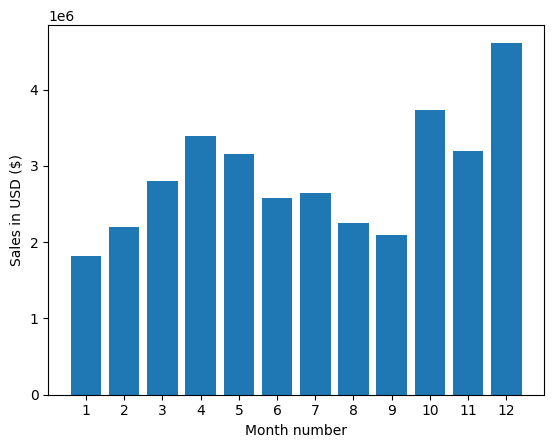

<Figure size 640x480 with 0 Axes>

In [102]:
import matplotlib.pyplot as plt 

months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()
plt.savefig('Sales Chart.png')

***Create Hour column***

**Question 2: What time we should display advertisement to maximize likelihood of customer's buying the product?**


In [121]:
#add hour, minute, count, columns
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute']=pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count']=1
all_data.head()

C:\Users\pratik.gade\AppData\Local\Temp\ipykernel_20556\88254507.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\pratik.gade\AppData\Local\Temp\ipykernel_20556\88254507.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute']=pd.to_datetime(all_data['Order Date']).dt.minute


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,)]


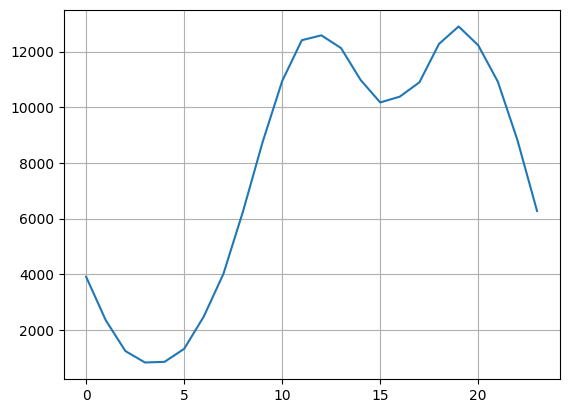

In [131]:
keys=[pair for pair, df in all_data.groupby(['Hour'])]
print(keys)
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
# plt.xticks(keys)
plt.grid()
plt.show()


#My recomendation is before 11 am and after 7 pm

**Question 3: What products are most often sold together?**

In [132]:
#Referenced: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df=all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2=df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\pratik.gade\AppData\Local\Temp\ipykernel_20556\2786521708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [133]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 4:What product sold the most?**

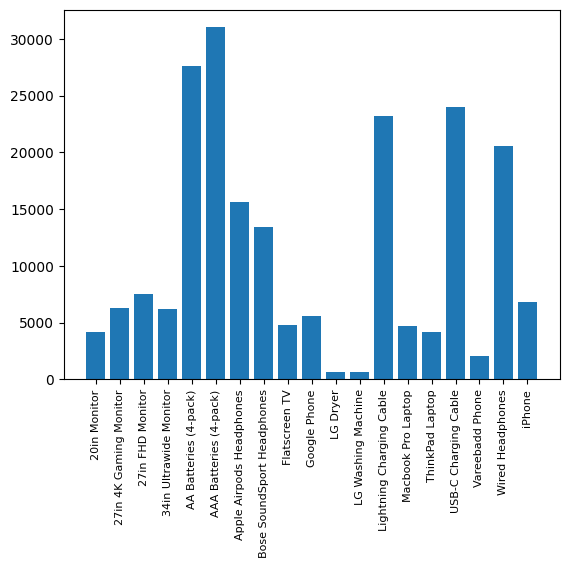

In [134]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
#print(product_group)
#print(quantity_ordered)
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()